In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [109]:
df = pd.read_clipboard()

In [110]:
df.head()

,timestamp,x,y
0,2018-04-30 00:00:00,1.84,A
1,2018-04-30 01:00:00,1.47,C
2,2018-04-30 02:00:00,0.20,B
3,2018-04-30 03:00:00,0.17,C
4,2018-04-30 04:00:00,2.06,C


In [111]:
df.describe()

,x
count,48.000000
mean,0.026250
std,1.097024
min,-2.050000
25%,-0.842500
50%,0.190000
75%,0.687500
max,2.060000


In [119]:
df.timestamp= pd.to_datetime(df.timestamp)
df = df.set_index('timestamp')

In [120]:
df.head()

,x,y
timestamp,,
2018-04-30 00:00:00,1.84,A
2018-04-30 01:00:00,1.47,C
2018-04-30 02:00:00,0.20,B
2018-04-30 03:00:00,0.17,C
2018-04-30 04:00:00,2.06,C


By Group

> What is the maximum x value for group B?  
> What is the average x value for group A?  
> What is the minimum x value for group C?  
> Which group has the highest sum of x values?  

In [121]:
df.groupby('y').agg(['max', 'mean', 'min', 'sum'])

x                      
    max      mean   min   sum
y                            
A  1.84 -0.110556 -1.30 -1.99
B  1.91 -0.053846 -2.05 -0.70
C  2.06  0.232353 -1.83  3.95

Time Aggregates

> What is the least frequent y value for 2018-04-30?  
> What is the sum of the x values for 2018-05-01?  
> What is the average x value for each day? The median?  
> What is the most frequent y value for each day?

In [129]:
df.resample('D').agg(['sum', 'mean'])

x        
             sum    mean
timestamp               
2018-04-30  5.28  0.2200
2018-05-01 -4.02 -0.1675

In [130]:
df.groupby([df.index.date, 'y']).count()

x
           y    
2018-04-30 A  10
           B   7
           C   7
2018-05-01 A   8
           B   6
           C  10

Visualization

> Visualize the minimum x value of each group with a bar chart.  
> Visualize x over time.  
> Visualize x over time by y value.  

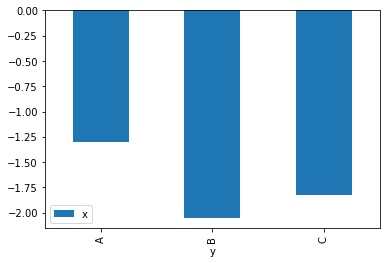

In [135]:
df.groupby('y').min().plot(kind='bar')

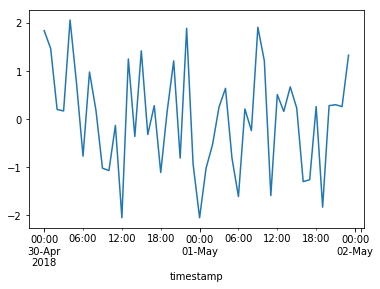

In [124]:
df.x.plot(kind='line')

x
y timestamp                                    
A 2018-04-30  AxesSubplot(0.125,0.2;0.775x0.68)
  2018-05-31  AxesSubplot(0.125,0.2;0.775x0.68)
B 2018-04-30  AxesSubplot(0.125,0.2;0.775x0.68)
  2018-05-31  AxesSubplot(0.125,0.2;0.775x0.68)
C 2018-04-30  AxesSubplot(0.125,0.2;0.775x0.68)
  2018-05-31  AxesSubplot(0.125,0.2;0.775x0.68)

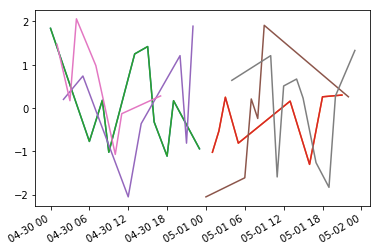

In [132]:
df.groupby('y').resample('M').plot(kind='line')